In [1]:
import numpy as np
from qiskit.algorithms.optimizers import CMAES, GradientDescent, TellObject, SPSA
import matplotlib.pyplot as plt
from pylab import figure, cm
from matplotlib.patches import Ellipse
np.random.seed(12)

We are going to define the rosenbrock function. This function can be generalized to N dimenstions and the optimal value lives inside a valley. Is is commonly used to benchmark optimizers.

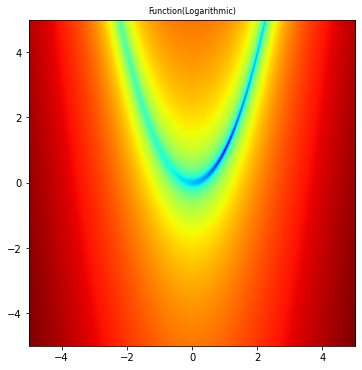

In [2]:
def rosenbrock_function(x): #Sum(1,d-1):100(x_{i+1}-x_i^2)^2 + (x_i-1)^2
    d=x.size
    A = x[1:]-x[:-1]**2
    B = x[:-1]-1
    return np.sum(100*A**2 + (B)**2 , axis = 0)


def banana_function(x,y): #2D case
    return rosenbrock_function(np.array([x,y]))


x1_min, x1_max = -5, 5
x2_min, x2_max = -5, 5

x1, x2 = np.meshgrid(np.linspace(x1_min,x1_max,500), np.linspace(x2_min,x2_max, 500))
y = banana_function(x1,x2)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(np.log10(y),extent=[x1_min,x1_max,x2_min,x2_max], cmap=cm.jet, origin='lower')
ax.set_title("Function(Logarithmic)" , fontsize=8)
plt.show()

In [9]:
ellipses = []
def callback(x,eigenvectors,std_vector):
        angle = 360/(2*np.pi) * np.arctan(eigenvectors[1,0]/eigenvectors[0,0])
        ellipses.append(((x[0], x[1]),std_vector[0],std_vector[1],angle))

N = 50
tol = 1e-8
initial_point = np.random.normal(0,0.5,N)
sigma_0 = 1.5 * np.linalg.norm(initial_point - 1) #The initial point must lie in a box of size sigma arround the optimal point.
print("x0=",initial_point,"|x0-1|",np.linalg.norm(initial_point-1)/np.sqrt(N), "\sigma:",sigma_0)

# optimizer = SPSA(maxiter = 500000)
termination_citeria = None
{
            "NoEffectAxis": 0,
            "TolXUp": 1e4,
            "TolFun": 1e-12,
            "NoEffectCoord": 0,
            "ConditionCov": 1e14,
        }
optimizer = CMAES(maxiter=15000 ,sigma_0 = sigma_0,callback = callback, termination_criteria=termination_citeria)
# optimizer = GradientDescent(maxiter = 5000, tol=tol,callback = callback_gd,learning_rate = 1e-4)

result = optimizer.minimize(x0=initial_point, fun=rosenbrock_function,)
# while optimizer.continue_condition():
#     optimizer.step()
#     optimizer._callback_wrapper()
    
# result = optimizer.create_result()
print(f"After {result.nit} generations and {result.nfev} function evaluations ({optimizer.mu}eval/gen)")
print("We get an objective of:",result.fun)
print("At x=",result.x,"|x0-1|/sqrt(N)=",np.linalg.norm(result.x-1)/np.sqrt(N))
print("Stopping Criteria:",optimizer.get_stopping_condition())

x0= [-0.66966525 -0.09206017  0.13773977 -0.58621234  0.20273649 -0.04303672
  0.54161595  0.02302683  0.10522372  0.23279799  0.47709136 -0.0732393
  0.64289067  0.6471854   0.72518515  0.30653328 -0.32546391  0.10747223
 -1.10198573  0.90762933 -0.57043772  0.25694949 -0.16696661  0.34286244
  0.17059588 -0.28176896 -0.50263477  0.34943373 -0.27613074 -0.27939241
  0.01366833  0.47989051  0.1911441   0.20039459 -1.02616828  0.83377903
 -1.06245448  0.03855423 -0.75589933  0.07026444 -0.1130465   0.87284128
 -0.24258203  0.23327335  0.51988924  0.39272044  0.24853991  0.77095694
 -0.53954766  0.92090797] |x0-1| 1.0639193554500193 \sigma: 11.284568863114943
After 934 generations and 14010 function evaluations (7eval/gen)
We get an objective of: 48.37024532181701
At x= [ 0.07096986  0.01320824  0.0100686   0.00942402  0.01060385  0.01093759
  0.0095838   0.0102343   0.00995311  0.0097098   0.01034489  0.01003319
  0.01006237  0.01082205  0.01056163  0.01020192  0.0106851   0.01165174
  

In [4]:
optimizer._state._best_func_hist

[6.58727294303699e-07,
 6.596973993425162e-07,
 6.578146405803912e-07,
 6.576151421220489e-07,
 6.574183267429322e-07,
 6.565459960148096e-07,
 6.566010746526287e-07,
 6.549759369464192e-07,
 6.544171693034818e-07,
 6.536471883224731e-07,
 6.539776021757048e-07,
 6.535015294030285e-07,
 6.529836083505147e-07,
 6.52792566146573e-07,
 6.517438921071389e-07,
 6.51831394671987e-07,
 6.511154008459954e-07,
 6.509738152857035e-07,
 6.507421528985723e-07,
 6.505681111693353e-07,
 6.505167784962319e-07,
 6.503185328274819e-07,
 6.502732098248804e-07,
 6.502975690175914e-07,
 6.500721376814414e-07,
 6.501034624269226e-07,
 6.501459832123564e-07,
 6.50064650393967e-07]

<IPython.core.display.Javascript object>


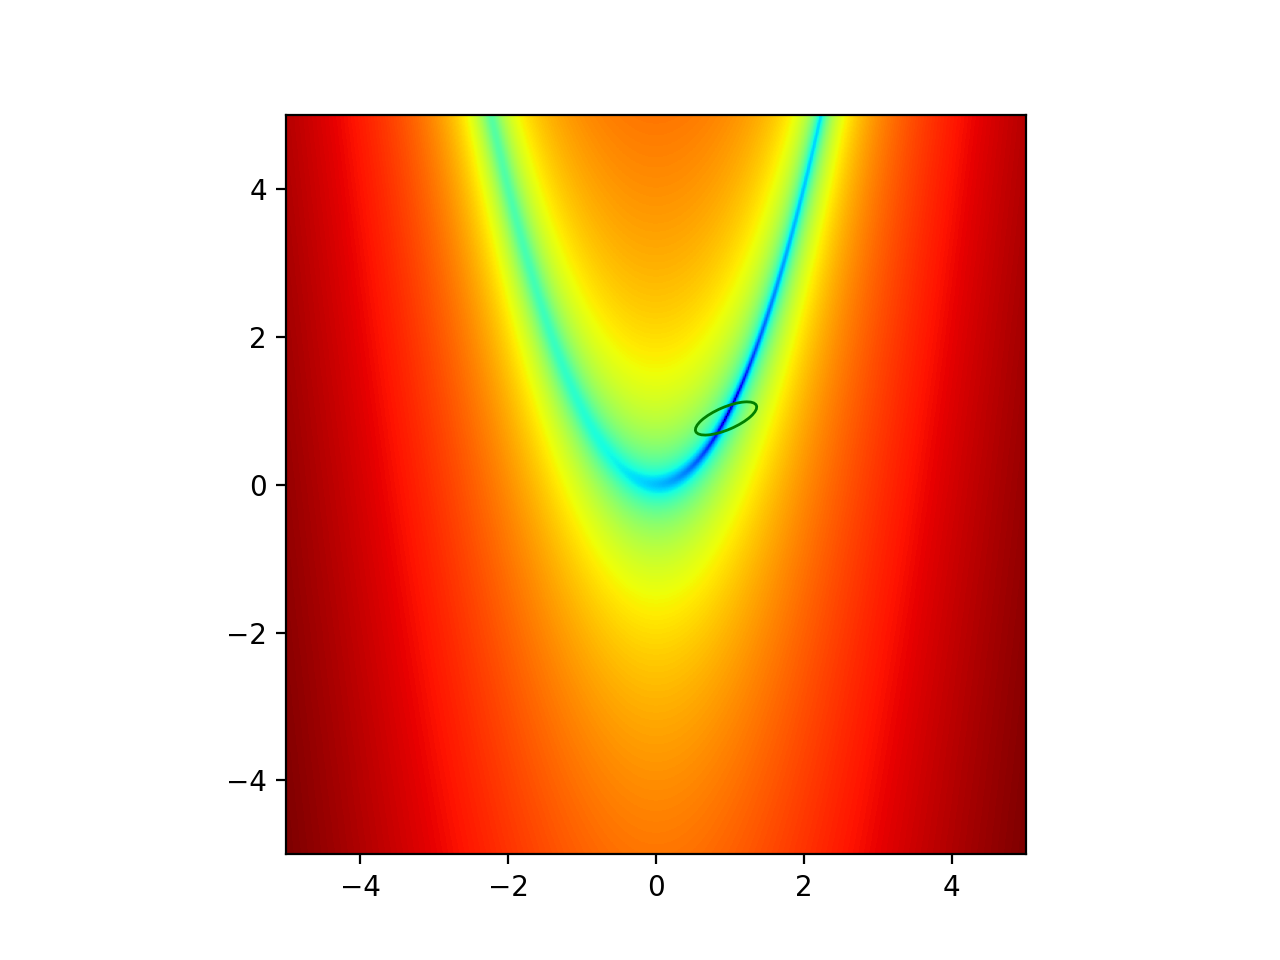

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import animation
%matplotlib notebook

ellipses_show = ellipses[:700]

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.imshow(np.log10(y),extent=[x1_min,x1_max,x2_min,x2_max], cmap=cm.jet, origin='lower')
ax.set_xlim([x1_min,x1_max])
ax.set_ylim([x2_min,x2_max])
ellipse_show = Ellipse((0, 0),
            width=1,
            height=2,
            angle=0,
            facecolor='none',
            edgecolor='green'
            )
ax.add_patch(ellipse_show)
plt.show()
def init():
    ellipse_show.set_visible(False)
    return [ellipse_show]

def animate(i):
    if i == 1:
        ellipse_show.set_visible(True)
    ellipse_show.center = ellipses_show[i][0]
    ellipse_show.width = ellipses_show[i][1]
    ellipse_show.height = ellipses_show[i][2]
    ellipse_show.angle = ellipses_show[i][3] 
    return [ellipse_show]

anim = animation.FuncAnimation(fig, animate, init_func=init, interval=5, blit=True)
plt.show()
